In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_excel("retail_sales.xlsx")

# Check the first few rows of the dataset
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [32]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Handle missing values
# For numerical columns, we will impute missing values with the median
imputer = SimpleImputer(strategy='median')
df['Quantity'] = imputer.fit_transform(df[['Quantity']])
df['Price per Unit'] = imputer.fit_transform(df[['Price per Unit']])
df['Total Amount'] = imputer.fit_transform(df[['Total Amount']])

# For categorical columns, we will fill missing values with 'Unknown'
df['Product Category'] = df['Product Category'].fillna('Unknown')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


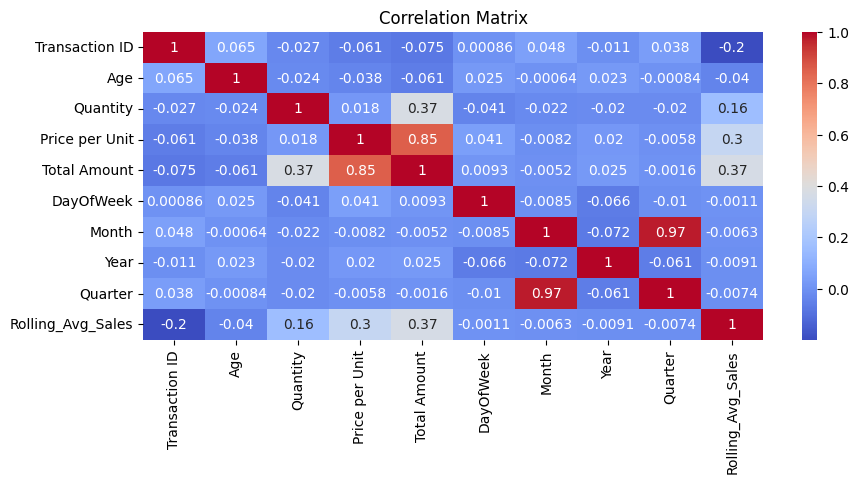

In [38]:
# Drop non-numeric columns before calculating correlation matrix
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_df = df[numerical_cols]

# Check the correlation matrix only for numerical columns
corr_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


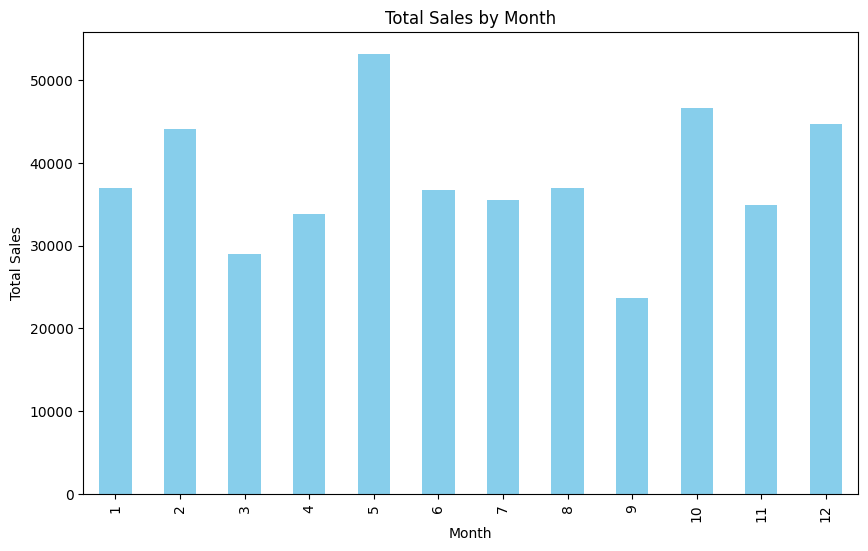

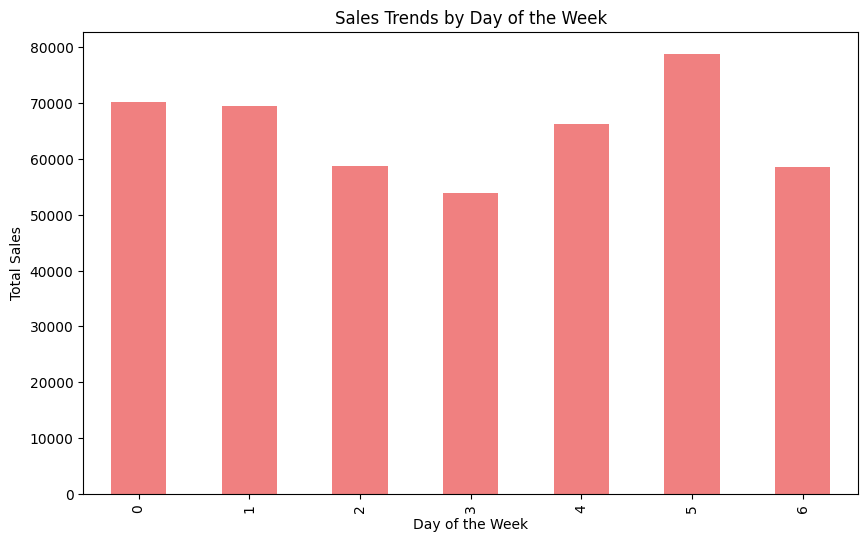

Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount, DayOfWeek, Month, Year, Quarter]
Index: []


In [34]:
# Extract additional time-based features
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter

# Plot sales over time (Monthly total sales)
monthly_sales = df.groupby('Month')['Total Amount'].sum()
monthly_sales.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Sales trends by day of the week
weekly_sales = df.groupby('DayOfWeek')['Total Amount'].sum()
weekly_sales.plot(kind='bar', figsize=(10,6), color='lightcoral')
plt.title('Sales Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

# Detecting outliers (example: using the IQR method)
Q1 = df['Total Amount'].quantile(0.25)
Q3 = df['Total Amount'].quantile(0.75)
IQR = Q3 - Q1

# Outliers in 'Total Amount'
outliers = df[(df['Total Amount'] < (Q1 - 1.5 * IQR)) | (df['Total Amount'] > (Q3 + 1.5 * IQR))]
print(outliers)


In [35]:
# Create rolling averages for the last 7 days
df['Rolling_Avg_Sales'] = df['Total Amount'].rolling(window=7).mean()

# One-hot encode 'Product Category'
df = pd.get_dummies(df, columns=['Product Category'], drop_first=True)

# Create a new feature: 'Customer Age Group'
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['<18', '18-30', '30-40', '40-50', '50-60', '>60'])

# Normalize or Standardize the 'Quantity' and 'Price per Unit' columns
scaler = StandardScaler()
df[['Quantity', 'Price per Unit']] = scaler.fit_transform(df[['Quantity', 'Price per Unit']])


Age Group
<18       11215.0
18-30    121730.0
30-40     95950.0
40-50     93795.0
50-60    100085.0
>60       33225.0
Name: Total Amount, dtype: float64


/tmp/ipython-input-837483848.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_segmentation = df.groupby('Age Group')['Total Amount'].sum()


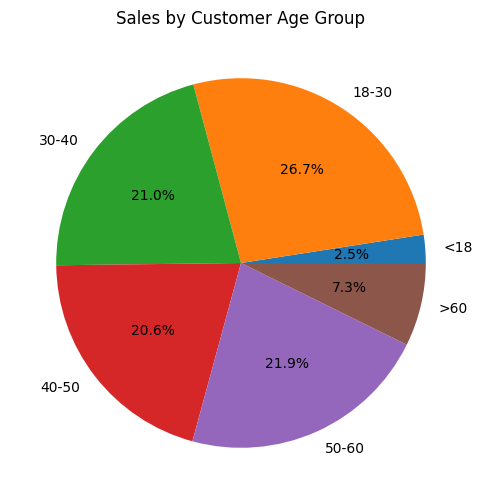

In [36]:
# Group by 'Age Group' and calculate total sales
customer_segmentation = df.groupby('Age Group')['Total Amount'].sum()
print(customer_segmentation)

# Visualize sales by customer age group
customer_segmentation.plot(kind='pie', autopct='%1.1f%%', figsize=(10,6))
plt.title('Sales by Customer Age Group')
plt.ylabel('')
plt.show()


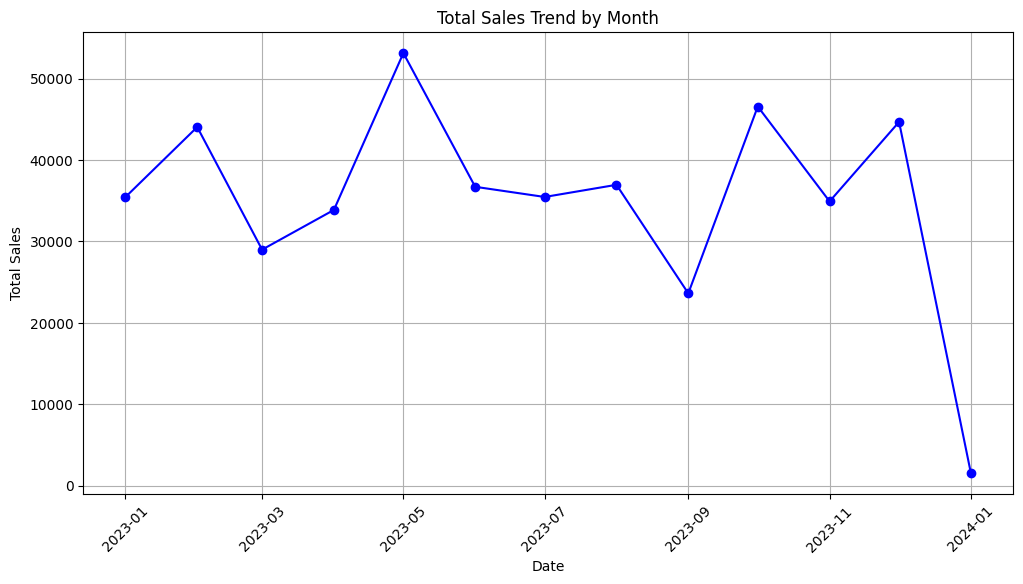

In [39]:
# Extract time-based features
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter

# Group sales by month and year for visualization
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Total Amount'], marker='o', color='b')
plt.title('Total Sales Trend by Month')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/tmp/ipython-input-2916929222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette="viridis")


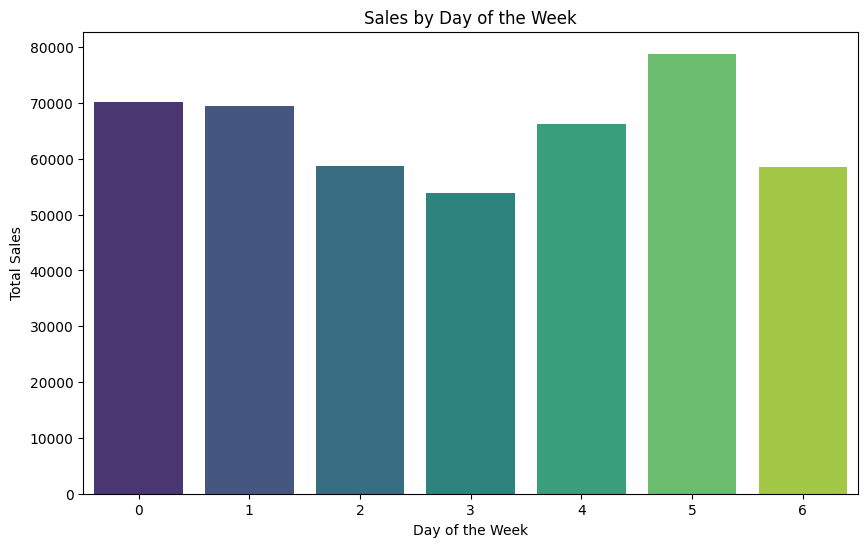

In [40]:
# Group sales by day of the week and plot
weekly_sales = df.groupby('DayOfWeek')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette="viridis")
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()


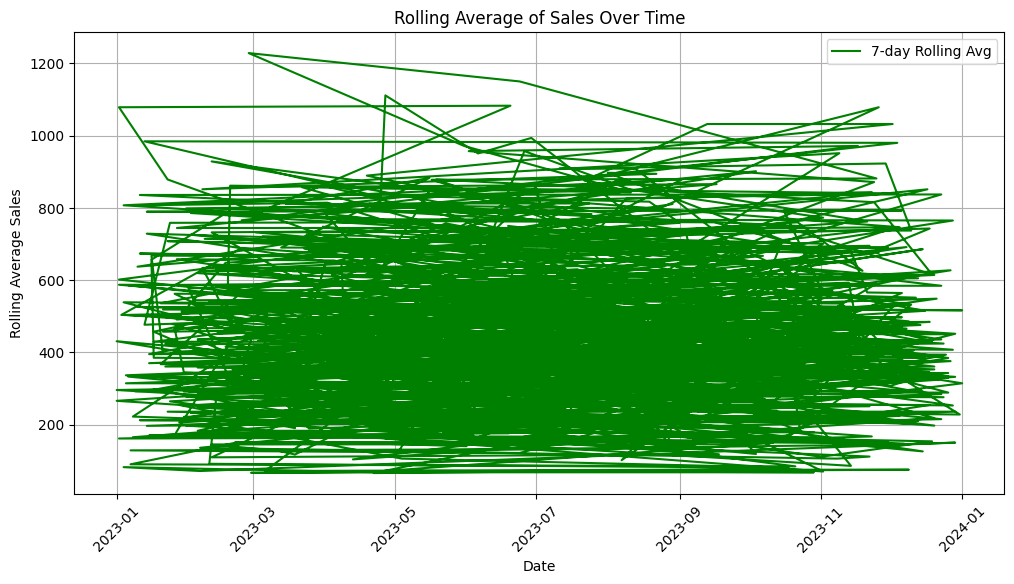

In [41]:
# Create a rolling average of sales over the past 7 days
df['Rolling_Avg_Sales'] = df['Total Amount'].rolling(window=7).mean()

# Visualize the rolling average trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Rolling_Avg_Sales'], color='green', label='7-day Rolling Avg')
plt.title('Rolling Average of Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [44]:
# Calculate IQR for outlier detection in 'Total Amount'
Q1 = df['Total Amount'].quantile(0.25)
Q3 = df['Total Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Total Amount'] < lower_bound) | (df['Total Amount'] > upper_bound)]

# Display outliers
print(outliers)


Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Quantity, Price per Unit, Total Amount, DayOfWeek, Month, Year, Quarter, Rolling_Avg_Sales, Product Category_Clothing, Product Category_Electronics, Age Group]
Index: []


/tmp/ipython-input-568710761.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='pastel')


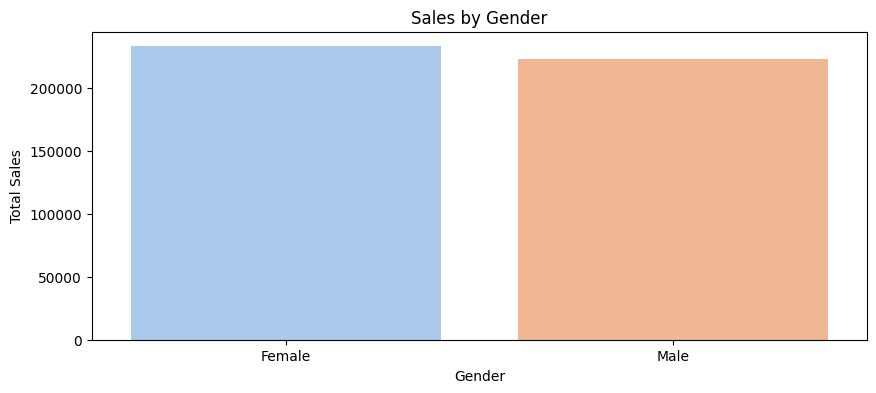

In [46]:
# Group sales by 'Gender' to analyze purchasing behavior based on gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()

# Visualize sales by gender
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='pastel')
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()


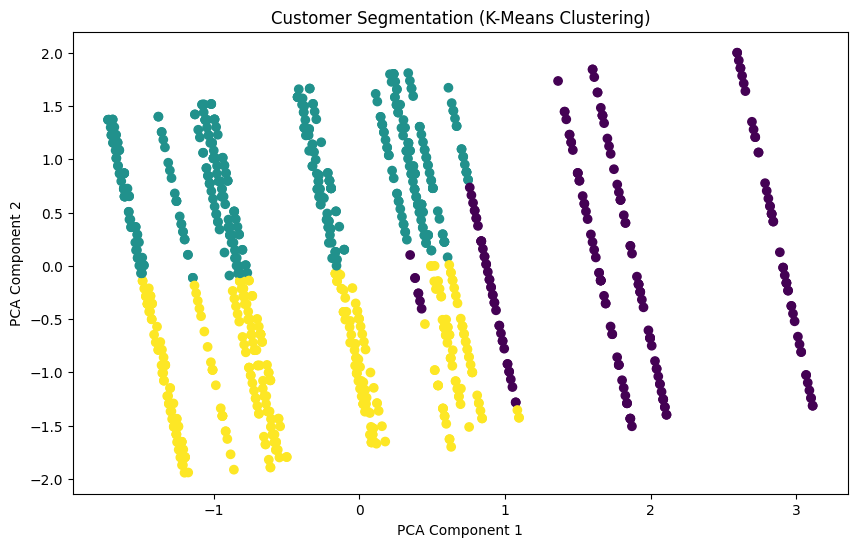

In [48]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract features for segmentation
customer_data = df[['Quantity', 'Total Amount', 'Age']].dropna()

# Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)  # You can try different values for n_clusters
df['Customer_Segment'] = kmeans.fit_predict(customer_data_scaled)

# Perform PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(customer_data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Customer_Segment'], cmap='viridis')
plt.title('Customer Segmentation (K-Means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


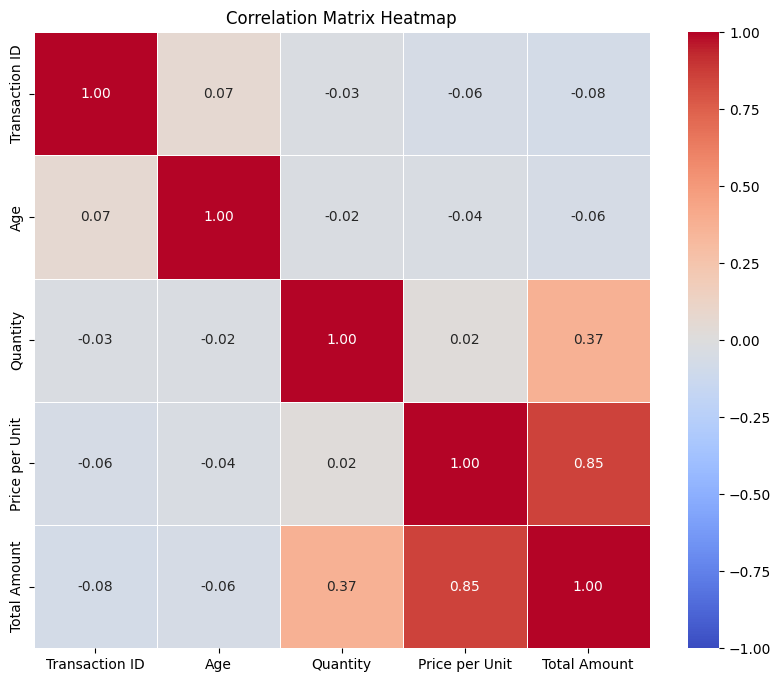

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (make sure it's the correct path to your file)
df = pd.read_excel('retail_sales.xlsx')

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_cols]

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set figure size for better clarity
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, vmin=-1, vmax=1)

# Title and display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()


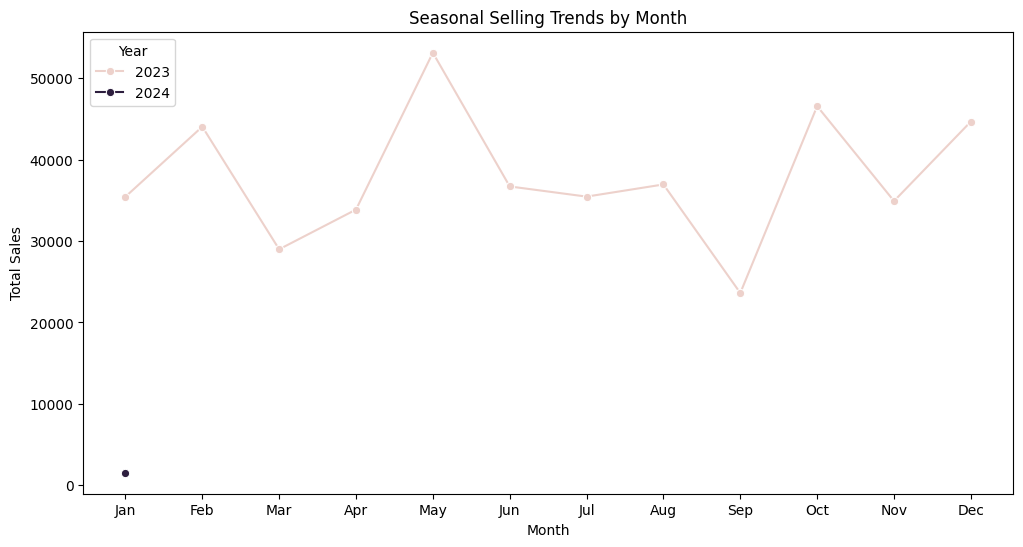

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure it's the correct path to your file)
df = pd.read_excel('retail_sales.xlsx')

# Extract Month and Year from Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by Month and Year, then sum the sales (Total Amount)
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()

# Plot Monthly Sales over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', hue='Year', marker='o')

# Title and labels
plt.title('Seasonal Selling Trends by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper left')
plt.show()


/tmp/ipython-input-1062121485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_sales, x='Gender', y='Total Amount', palette='Blues_d')


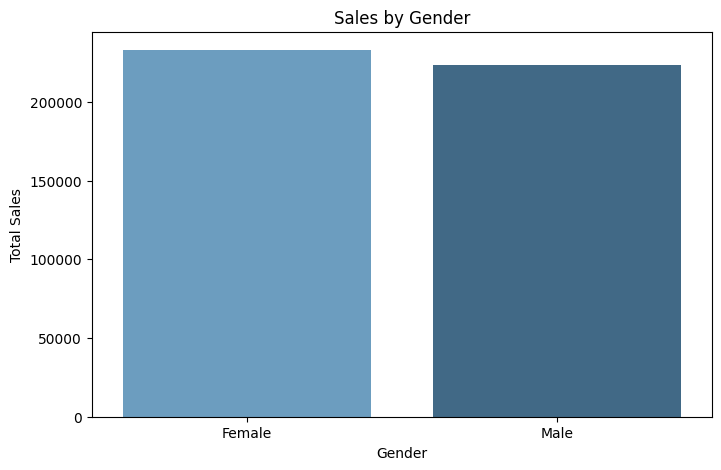

In [7]:
# Group by Gender and sum the sales (Total Amount)
gender_sales = df.groupby('Gender')['Total Amount'].sum().reset_index()

# Plot Gender-wise Sales
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_sales, x='Gender', y='Total Amount', palette='Blues_d')
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()


/tmp/ipython-input-3475804245.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_sales, x='Day of Week', y='Total Amount', palette='viridis')


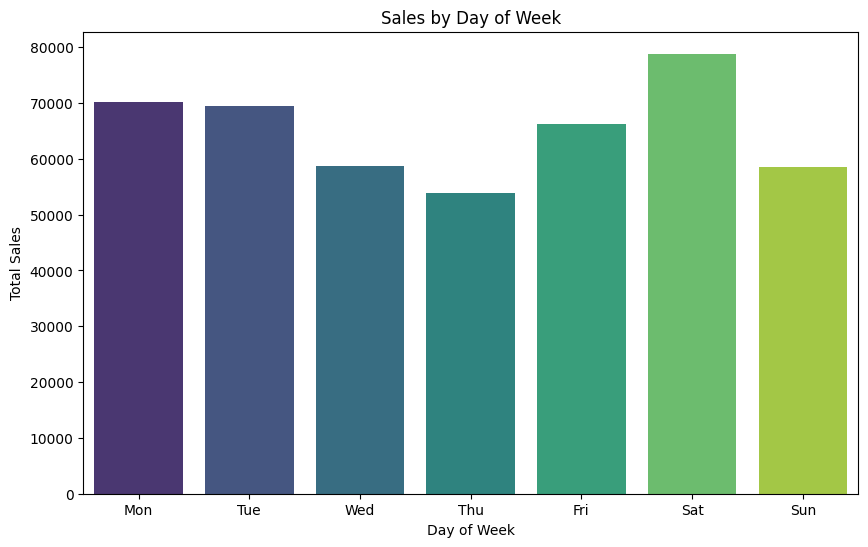

In [8]:
# Extract Day of the Week from Date (0 = Monday, 6 = Sunday)
df['Day of Week'] = df['Date'].dt.dayofweek

# Group by Day of Week and sum the sales (Total Amount)
weekday_sales = df.groupby('Day of Week')['Total Amount'].sum().reset_index()

# Plot Sales by Weekday
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_sales, x='Day of Week', y='Total Amount', palette='viridis')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


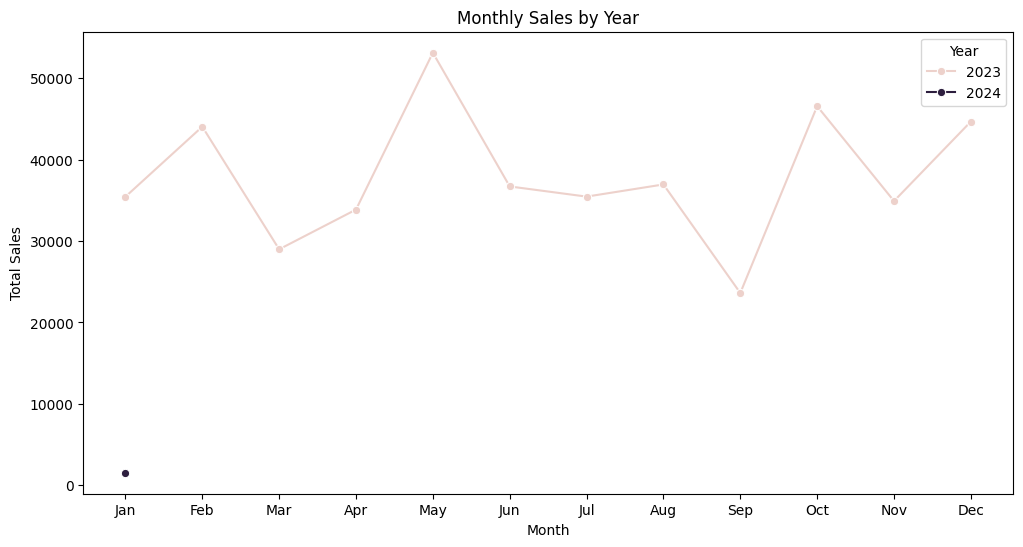

In [9]:
# Extract Month from Date
df['Month'] = df['Date'].dt.month

# Group by Month and Year, then sum the sales (Total Amount)
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()

# Plot Monthly Sales over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', hue='Year', marker='o')
plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()


   Gender  Total Amount
0  Female        232840
1    Male        223160


/tmp/ipython-input-659718720.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_sales, x='Gender', y='Total Amount', palette='viridis')


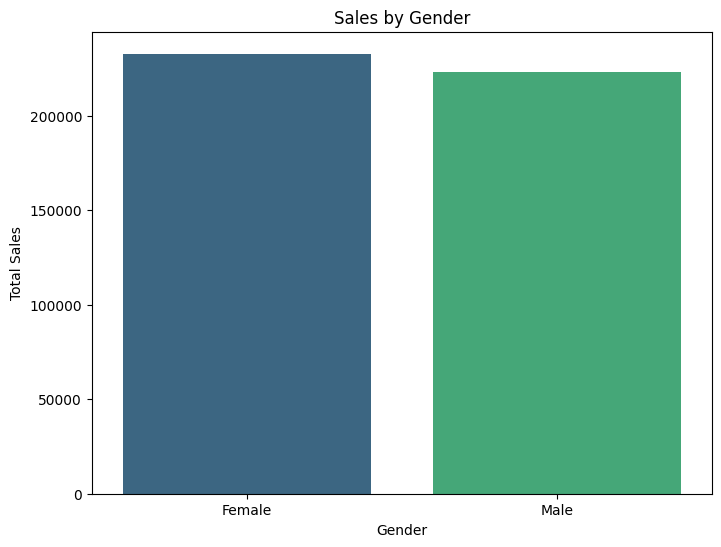

In [24]:
# Group by Gender and sum the sales (Total Amount)
gender_sales = df.groupby('Gender')['Total Amount'].sum().reset_index()

# Sort by Total Amount to identify which gender has higher sales
gender_sales = gender_sales.sort_values(by='Total Amount', ascending=False)

# Display the sales by gender
print(gender_sales)

# Plot sales by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_sales, x='Gender', y='Total Amount', palette='viridis')
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()


In [13]:
# Calculate Revenue Per Transaction (RPT)
avg_revenue_per_transaction = df['Total Amount'].mean()

# Display average revenue
print(f"Average Revenue Per Transaction: ${avg_revenue_per_transaction:.2f}")


Average Revenue Per Transaction: $456.00


/tmp/ipython-input-916374353.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()
/tmp/ipython-input-916374353.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_sales, x='Age Group', y='Total Amount', palette='coolwarm')


  Age Group  Total Amount
1     19-30        121730
4     51-60        100085
2     31-40         95950
3     41-50         93795
5       60+         33225
0      0-18         11215


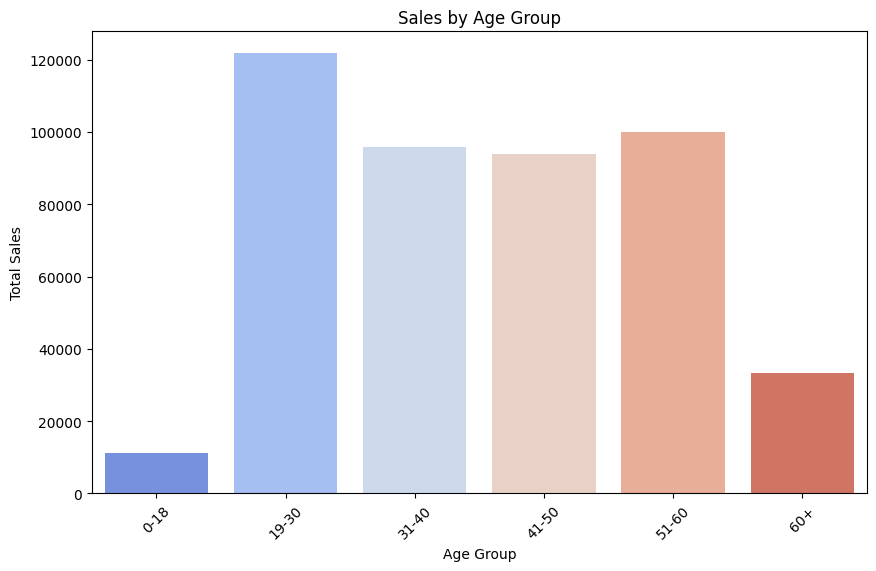

In [25]:
# Group by Age Group and sum the sales (Total Amount)
age_group_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()

# Sort by Total Amount to identify which age group has the highest sales
age_group_sales = age_group_sales.sort_values(by='Total Amount', ascending=False)

# Display the sales by age group
print(age_group_sales)

# Plot sales by age group
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_sales, x='Age Group', y='Total Amount', palette='coolwarm')
plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

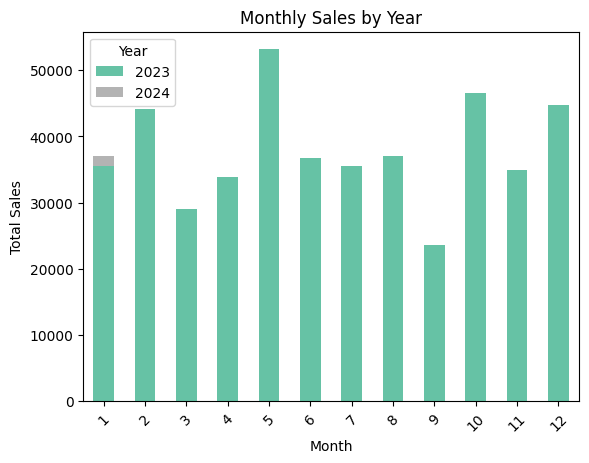

In [26]:
# Group by Year and Month, then sum the sales (Total Amount)
month_year_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()

# Pivot for better visualization
month_year_sales_pivot = month_year_sales.pivot(index='Month', columns='Year', values='Total Amount')

# Plot sales by Month and Year
plt.figure(figsize=(12, 8))
month_year_sales_pivot.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()


   Day of Week  Total Amount
5            5         78815
0            0         70250
1            1         69440
4            4         66290
2            2         58770
6            6         58600
3            3         53835


/tmp/ipython-input-2168734472.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_of_week_sales, x='Day of Week', y='Total Amount', palette='viridis')


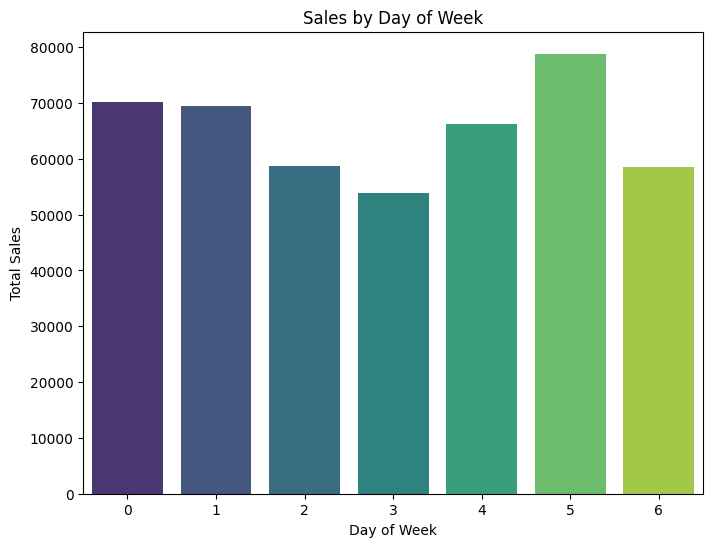

In [28]:
# Group by Day of Week and sum the sales (Total Amount)
day_of_week_sales = df.groupby('Day of Week')['Total Amount'].sum().reset_index()

# Sort by Total Amount to identify which day has the highest sales
day_of_week_sales = day_of_week_sales.sort_values(by='Total Amount', ascending=False)

# Display the sales by day of week
print(day_of_week_sales)

# Plot sales by day of the week
plt.figure(figsize=(8, 6))
sns.barplot(data=day_of_week_sales, x='Day of Week', y='Total Amount', palette='viridis')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()


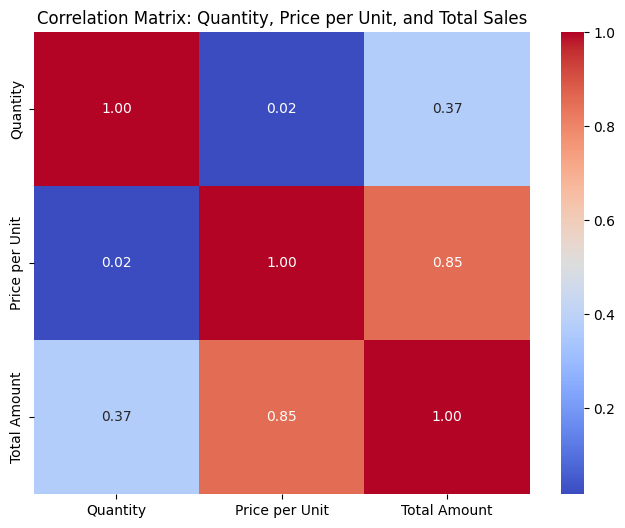

In [29]:
# Correlation between Quantity, Price per Unit, and Total Sales
correlation_matrix = df[['Quantity', 'Price per Unit', 'Total Amount']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Quantity, Price per Unit, and Total Sales')
plt.show()


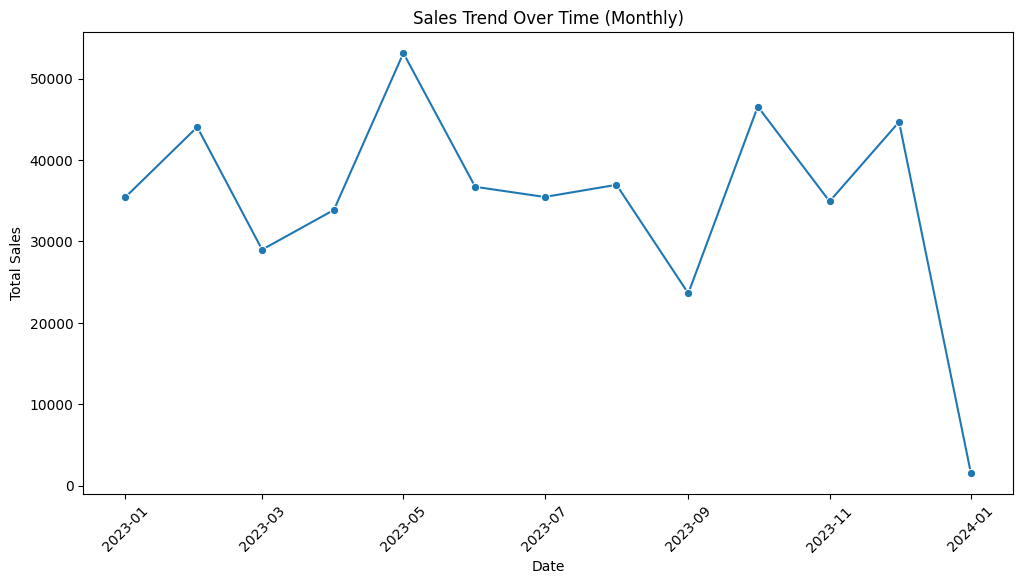

In [30]:
# Group by Year and Month, then sum the sales (Total Amount)
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()

# Create a datetime column for easy time series analysis
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# Plot sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Total Amount', marker='o')
plt.title('Sales Trend Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-3476282182.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_sales = df.groupby(['Age Group', 'Gender'])['Total Amount'].sum().reset_index()


   Age Group  Gender  Total Amount
2      19-30  Female         61870
3      19-30    Male         59860
8      51-60  Female         54035
4      31-40  Female         50590
7      41-50    Male         48820
9      51-60    Male         46050
5      31-40    Male         45360
6      41-50  Female         44975
11       60+    Male         19795
10       60+  Female         13430
0       0-18  Female          7940
1       0-18    Male          3275


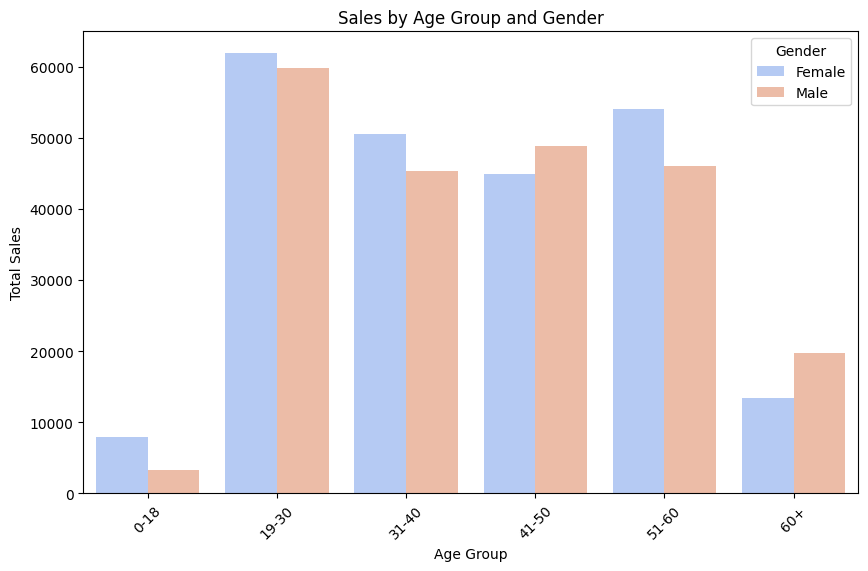

In [31]:
# Group by Age Group and Gender, then sum the sales (Total Amount)
age_gender_sales = df.groupby(['Age Group', 'Gender'])['Total Amount'].sum().reset_index()

# Sort by Total Amount to identify top-performing age group and gender combinations
age_gender_sales = age_gender_sales.sort_values(by='Total Amount', ascending=False)

# Display the sales by age group and gender
print(age_gender_sales)

# Plot sales by Age Group and Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=age_gender_sales, x='Age Group', y='Total Amount', hue='Gender', palette='coolwarm')
plt.title('Sales by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-916374353.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()
/tmp/ipython-input-916374353.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_sales, x='Age Group', y='Total Amount', palette='coolwarm')


  Age Group  Total Amount
1     19-30        121730
4     51-60        100085
2     31-40         95950
3     41-50         93795
5       60+         33225
0      0-18         11215


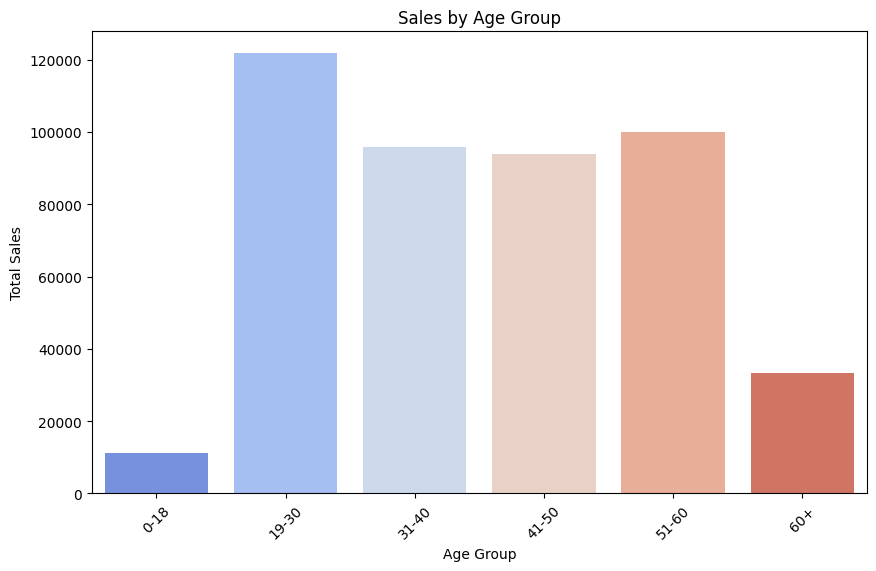

In [33]:
# Group by Age Group and sum the sales (Total Amount)
age_group_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()

# Sort by Total Amount to identify which age group has the highest sales
age_group_sales = age_group_sales.sort_values(by='Total Amount', ascending=False)

# Display the sales by age group
print(age_group_sales)

# Plot sales by age group
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_sales, x='Age Group', y='Total Amount', palette='coolwarm')
plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-3476282182.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_sales = df.groupby(['Age Group', 'Gender'])['Total Amount'].sum().reset_index()


   Age Group  Gender  Total Amount
2      19-30  Female         61870
3      19-30    Male         59860
8      51-60  Female         54035
4      31-40  Female         50590
7      41-50    Male         48820
9      51-60    Male         46050
5      31-40    Male         45360
6      41-50  Female         44975
11       60+    Male         19795
10       60+  Female         13430
0       0-18  Female          7940
1       0-18    Male          3275


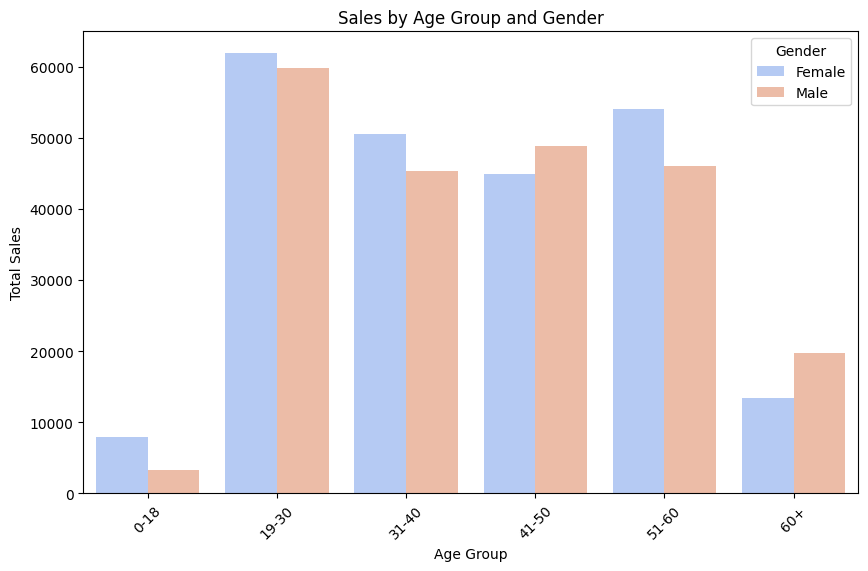

In [38]:
# Group by Age Group and Gender, then sum the sales (Total Amount)
age_gender_sales = df.groupby(['Age Group', 'Gender'])['Total Amount'].sum().reset_index()

# Sort by Total Amount to identify top-performing age group and gender combinations
age_gender_sales = age_gender_sales.sort_values(by='Total Amount', ascending=False)

# Display the sales by age group and gender
print(age_gender_sales)

# Plot sales by Age Group and Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=age_gender_sales, x='Age Group', y='Total Amount', hue='Gender', palette='coolwarm')
plt.title('Sales by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
